In [1]:
import torch
torch.cuda.set_device(3)
print(torch.cuda.current_device())

3


In [2]:
%run ../../prepare_data.py
%run ../../architectures.py

In [3]:
batch_size = 32

In [4]:
train_loader, valid_loader, valid_dataset = mura_dataloaders(batch_size)

In [5]:
x, y = next(iter(train_loader))

In [6]:
x.shape, y.shape

(torch.Size([32, 3, 250, 200]), torch.Size([32]))

In [7]:
model = MobileNet(width_mult=1.0, depth_mult=1.0).cuda()

In [8]:
sum(p.numel() for p in model.parameters())

2225153

CPU times: user 1min 16s, sys: 5.37 s, total: 1min 22s
Wall time: 1min 22s


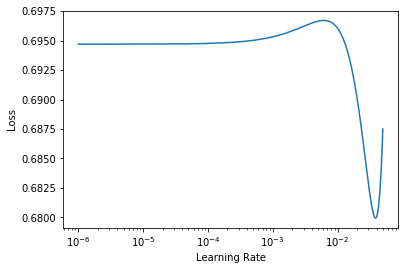

In [9]:
%%time
lrs, losses = LR_range_finder(model, train_loader, 
                              loss_fn=F.binary_cross_entropy_with_logits, 
                              binary=True, lr_high=0.05)
plot_lr(lrs, losses)

# Training

In [9]:
widths = [1.0, 0.75, 0.5, 0.25]
depths = [1.0, 0.7, 0.6, 0.5, 0.3, 0.2]

In [ ]:
data = []

for w in widths:
    for d in depths:
        print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
        model = MobileNet(width_mult=w, depth_mult=d).cuda()
        p = sum(p.numel() for p in model.parameters())
        optimizer = create_optimizer(model, 0.02)
        score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                           loss_fn=F.binary_cross_entropy_with_logits, 
                                           dataset='mura', binary=True, max_lr=0.02, epochs=15)
        
        p = "/home/rimmanni/Medical_Images/Scaling_experiments/Mura/Mobile_" + str(w) + '_' + str(d)
        save_model(model, p)
        data.append([w, d, score, p, t])
        print('')

width multiplier - 1.000 depth multiplier - 1.000
train_loss 0.677 val_loss 0.688 val_auc_score 0.629
----End of step 0:01:31.101449
train_loss 0.665 val_loss 0.695 val_auc_score 0.587
----End of step 0:01:28.879339
train_loss 0.654 val_loss 0.672 val_auc_score 0.662
----End of step 0:01:32.982576
train_loss 0.642 val_loss 0.699 val_auc_score 0.660
----End of step 0:01:36.503424
train_loss 0.613 val_loss 0.683 val_auc_score 0.691
----End of step 0:01:34.066646
train_loss 0.592 val_loss 0.642 val_auc_score 0.755
----End of step 0:01:45.187480
train_loss 0.580 val_loss 0.617 val_auc_score 0.775
----End of step 0:01:44.730340
train_loss 0.567 val_loss 0.578 val_auc_score 0.782
----End of step 0:01:43.504541
train_loss 0.555 val_loss 0.591 val_auc_score 0.775
----End of step 0:01:41.785686
train_loss 0.546 val_loss 0.598 val_auc_score 0.803
----End of step 0:01:43.812738
train_loss 0.533 val_loss 0.551 val_auc_score 0.820
----End of step 0:01:45.447287
train_loss 0.521 val_loss 0.542 val_a

In [ ]:
columns = ['width_x', 'depth_x', 'val_score', 'params', 'time_per_epoch']
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
df.to_csv("mura_mobilenet_13.csv", index=False)

In [ ]:
df_re = pd.read_csv('mura_mobilenet_13.csv')

In [ ]:
df_re.head()